# Pour visualiser les points

In [1]:
import numpy as np
import torch 
from model import PINNs
from deepxrte.geometry import Rectangle
import pandas as pd
from utils import charge_data
import json

In [2]:
with open("results/5_model_2_case_2" + "/hyper_param.json", "r") as file:
    hyper_param = json.load(file)

# model = PINNs(hyper_param)
# checkpoint = torch.load('results/1_first_try'+'/model_weights.pth')#, map_location=torch.device('cpu'))
# model.load_state_dict(checkpoint['model_state_dict'])

In [3]:
param_adim = {
    'V':1.,
    'L':0.025,
    'rho': 1.2
}

In [4]:
X_train, U_train, X_full, U_full, X_border, X_border_test, mean_std = charge_data(hyper_param, param_adim)

In [5]:
import matplotlib.pyplot as plt

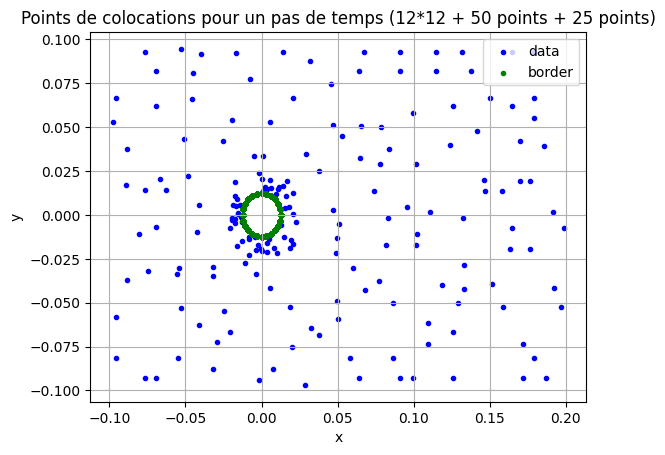

In [11]:
masque = X_train[:, 2] == np.unique(X_train[:, 2])[7]


x = (X_train[:,0][masque]*mean_std['x_std'] + mean_std['x_mean'])*param_adim['L']
y = (X_train[:,1][masque]*mean_std['y_std'] + mean_std['y_mean'])*param_adim['L']
x_border = (X_border[:,0]*mean_std['x_std'] + mean_std['x_mean'])*param_adim['L']
y_border = (X_border[:,1]*mean_std['y_std'] + mean_std['y_mean'])*param_adim['L']
plt.xlabel('x')
plt.ylabel('y')
plt.title('Points de colocations pour un pas de temps (12*12 + 50 points + 25 points)')
plt.grid()
plt.scatter(x, y, marker='.', color='blue', label='data')
plt.scatter(x_border, y_border, marker='.', color='green', label='border')
plt.legend()